In [7]:
#USING THIS TUTORIAL
#  https://github.com/krikit/syntaxnet/blob/master/syntaxnet.ipynb
import nltk
from IPython.display import Image, display
from nltk import Tree
from nltk.draw.util import CanvasFrame
from nltk.draw import TreeWidget

In [8]:
import os
from nltk.parse import stanford

In [9]:
with open('data/out_defs.txt','r') as f1:
    all_data_texts = f1.readlines()

In [31]:
raw = all_data_texts[65]
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sents = sent_detector.tokenize(raw)

print('========== SENTENCES ==========')
print('\n'.join(sents))

print('========== TOKENIZED ==========')
tokenized_sents = []
for sent in sents:
    words = nltk.word_tokenize(sent)
    tokenized_sents.append(words)
    print(' '.join(words))

========== SENTENCES ==========
       a coherent system  is injective if the evaluation morphism  is injective as a morphism of sheaves.
moreover  is torsion-free if it is injective and the quotient sheaf  is torsion-free.
========== TOKENIZED ==========
a coherent system is injective if the evaluation morphism is injective as a morphism of sheaves .
moreover is torsion-free if it is injective and the quotient sheaf is torsion-free .


In [32]:
tagged_sents = []
for tokens in tokenized_sents:
    tagged_pairs = nltk.pos_tag(tokens)
    tagged_sents.append(tagged_pairs)
    print(' '.join(['%s/%s' % (word, tag) for word, tag in tagged_pairs]))


a/DT coherent/NN system/NN is/VBZ injective/JJ if/IN the/DT evaluation/NN morphism/NN is/VBZ injective/JJ as/IN a/DT morphism/NN of/IN sheaves/NNS ./.
moreover/NN is/VBZ torsion-free/JJ if/IN it/PRP is/VBZ injective/JJ and/CC the/DT quotient/NN sheaf/NN is/VBZ torsion-free/JJ ./.


In [33]:
import os
from nltk.parse import stanford
STANFORD_DIR = '/home/luis/Paquetes/stanford-parser-full-2018-02-27/' 
os.environ['STANFORD_PARSER'] = '%s/stanford-parser.jar' % STANFORD_DIR
os.environ['STANFORD_MODELS'] = '%s/stanford-parser-3.9.1-models.jar' % STANFORD_DIR
parser = stanford.StanfordParser(model_path='%s/models/edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz' % STANFORD_DIR)
parsed_sents = []
for tree in parser.tagged_parse_sents(tagged_sents):
    tree_sent = '\n'.join([str(_) for _ in tree])
    parsed_sents.append(tree_sent)
    print(tree_sent)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPParser instead.
  


(ROOT
  (S
    (NP (DT a) (NN coherent) (NN system))
    (VP
      (VBZ is)
      (ADJP (JJ injective))
      (SBAR
        (IN if)
        (S
          (NP (DT the) (NN evaluation) (NN morphism))
          (VP
            (VBZ is)
            (ADJP
              (JJ injective)
              (PP
                (IN as)
                (NP
                  (NP (DT a) (NN morphism))
                  (PP (IN of) (NP (NNS sheaves))))))))))
    (. .)))
(ROOT
  (S
    (S
      (NP (NN moreover))
      (VP
        (VBZ is)
        (ADJP (JJ torsion-free))
        (SBAR
          (IN if)
          (S (NP (PRP it)) (VP (VBZ is) (ADJP (JJ injective)))))))
    (CC and)
    (S
      (NP (DT the) (NN quotient) (NN sheaf))
      (VP (VBZ is) (ADJP (JJ torsion-free))))
    (. .)))


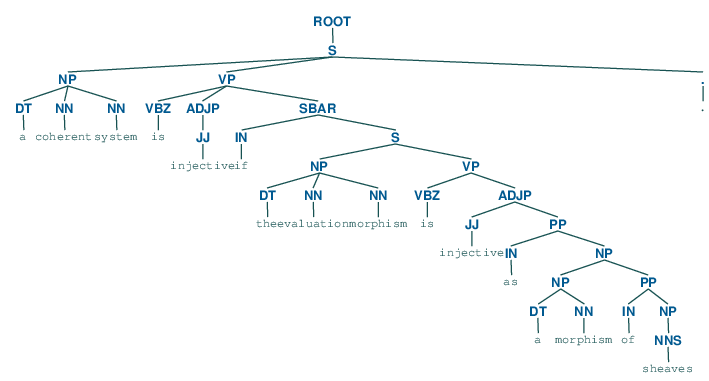

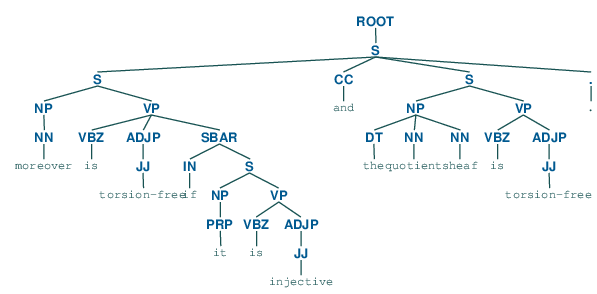

In [36]:
for idx, tree_str in enumerate(parsed_sents):
    cf = CanvasFrame()
    tree = Tree.fromstring(tree_str)
    tc = TreeWidget(cf.canvas(), tree)
    tc['node_font'] = 'arial 13 bold'
    tc['leaf_font'] = 'arial 12'
    tc['node_color'] = '#005990'
    tc['leaf_color'] = '#175252'
    tc['line_color'] = '#175252'
    cf.add_widget(tc, 10, 10)
    cf.print_to_file('tmp.ps')
    cf.destroy()
    os.system('convert tmp.ps tmp.png')    # need install: libpng, ghostscript, imagemagic
    display(Image(filename='tmp.png'))
    #os.remove('tmp.ps')
    #os.remove('tmp.png')